# 4.2 워드클라우드

### 4.2.1 워드 클라우드를 만드는 과정

In [1]:
# 예제 4-10 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel('./files/3_1_crawling_raw.xlsx')
raw_total['tags'] [:3]

0    ['#제주맛집', '#제주도맛집', '#제주도고기국수맛집', '#성산맛집', '#섭...
1    ['#서귀포맛집', '#제주도맛집', '#제주맛집', '#제주여행', '#제주도여행...
2    ['#제주맛집', '#중문맛집', '#중문전복돌솥밥', '#서귀포전복돌솥밥', '#...
Name: tags, dtype: object

In [2]:
# 예제 4-11 해시태그 통합 저장하기
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

### 4.2.3 해시태그 출현 빈도 집계

In [3]:
# 예제 4-12 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [4]:
# 예제 4-13 가장 많이 사용된 해시태그 살펴보기 
tag_counts.most_common(50)

[('#제주맛집', 2978),
 ('#제주여행', 2876),
 ('#제주관광', 2828),
 ('#제주도맛집', 1930),
 ('#제주도', 1747),
 ('#제주', 1440),
 ('#제주도여행', 1169),
 ('#서귀포맛집', 1106),
 ('#서귀포', 794),
 ('#제주도가볼만한곳', 714),
 ('#제주핫플레이스', 705),
 ('#jeju', 691),
 ('#제주카페', 559),
 ('#일상', 551),
 ('#제주도민', 537),
 ('#제주맛집추천', 530),
 ('#협재맛집', 514),
 ('', 514),
 ('#제주흑돼지맛집', 484),
 ('#성산일출봉', 480),
 ('#제주핫플', 477),
 ('#제주도흑돼지맛집', 467),
 ('#제주도흑돼지', 455),
 ('#제주살이', 455),
 ('#제주도그램', 453),
 ('#제주가볼만한곳', 449),
 ('#제주도관광', 440),
 ('#제주반영구', 439),
 ('#제주눈썹문신', 433),
 ('#선팔', 431),
 ('#서귀포눈썹문신', 419),
 ('#제주시', 418),
 ('#여행스타그램', 413),
 ('#제주흑돼지', 405),
 ('#섭지코지', 402),
 ('#반영구', 402),
 ('#눈썹문신', 400),
 ('#제주자연눈썹', 396),
 ('#제주속눈썹', 396),
 ('#서귀포남자눈썹문신', 394),
 ('#서귀포자연눈썹', 394),
 ('#제주남자눈썹문신', 394),
 ('#서귀포속눈썹', 394),
 ('#서귀포반영구', 394),
 ('#서귀포흑돼지맛집', 387),
 ('#성산일출봉맛집', 380),
 ('#여행', 375),
 ('#서귀포흑돼지', 369),
 ('#섭지코지맛집', 365),
 ('#제주메이크업', 358)]

In [5]:
# 예제 4-14 데이터 정제하기
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔', '#제주맛집','#제주여행','#제주관광','#제주도맛집','#제주','', '#제주도여행' ,
             '#서귀포맛집', '#서귀포', '#제주도가볼만한곳']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(10)


[('#제주핫플레이스', 705),
 ('#제주카페', 559),
 ('#제주도민', 537),
 ('#제주맛집추천', 530),
 ('#협재맛집', 514),
 ('#제주흑돼지맛집', 484),
 ('#성산일출봉', 480),
 ('#제주핫플', 477),
 ('#제주도흑돼지맛집', 467),
 ('#제주도흑돼지', 455)]

### 4.2.4 막대차트로 해시태그 살펴보기

In [6]:
# 예제 4-15 시각화 라이브러리 호출 및 환경 설정(한글 폰트)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)


In [7]:
# 예제 4-16 데이터 준비하기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(100))
tag_counts_df.columns = ['tags', 'counts']

In [8]:
tag_counts_df.to_csv('jeju_tags.csv', encoding='utf-8 sig')

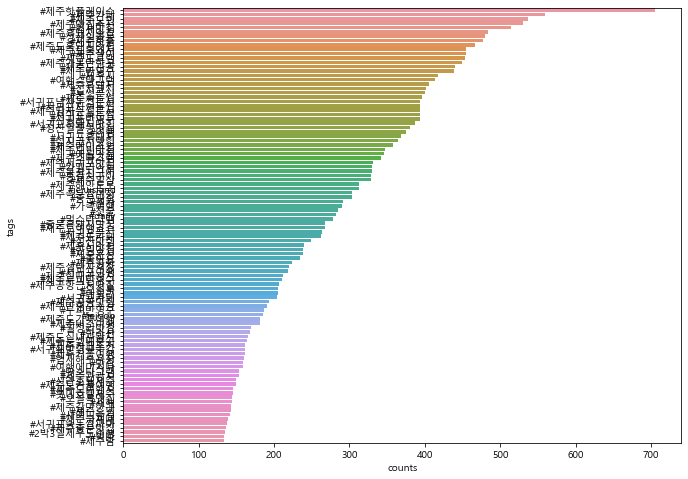

In [9]:
# 예제 4-17 막대 차트 그리기
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

### 4.2.5 워드 클라우드 그리기

In [10]:
# 예제 4-18 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"


In [11]:
tag_counts_selected

Counter({'#제주도고기국수맛집': 20,
         '#성산맛집': 249,
         '#섭지코지맛집': 365,
         '#제주광치기해변맛집': 1,
         '#제주현지인맛집': 67,
         '#제주가볼만한곳': 449,
         '#중문맛집': 303,
         '#중문전복돌솥밥': 1,
         '#서귀포전복돌솥밥': 1,
         '#중문전복뚝배기': 1,
         '#서귀포아침식사맛집': 1,
         '#주말가족나들이': 1,
         '#챔피언R': 1,
         '#통통한제주은갈치': 1,
         '#싱싱한활전복': 1,
         '#남녀노소좋아하는새우': 1,
         '#쫄깃한문어': 1,
         '#해산물통갈치조림': 1,
         '#제주도비올때좋은곳': 1,
         '#제주도1등오션뷰': 1,
         '#애월맛집': 346,
         '#제주도민추천': 6,
         '#도민맛집': 50,
         '#애월읍맛집': 19,
         '#제주도갈치맛집': 1,
         '#애월갈치조림': 1,
         '#제주도갈치조림': 14,
         '#제주도갈치조림맛집': 11,
         '#애월갈치조림맛집': 1,
         '#애월통갈치구이': 1,
         '#애월하미': 2,
         '#마가리따은혜씨수제버거ㆍ감바스ㆍ빠에야': 1,
         '#제주성산맛집': 110,
         '#제주도카페': 262,
         '#제주카페': 559,
         '#한담맛집': 30,
         '#서귀포카페': 204,
         '#우도맛집': 82,
         '#세화맛집': 75,
         '#협재맛집': 514,
         '#제주맛집추천': 530,
  

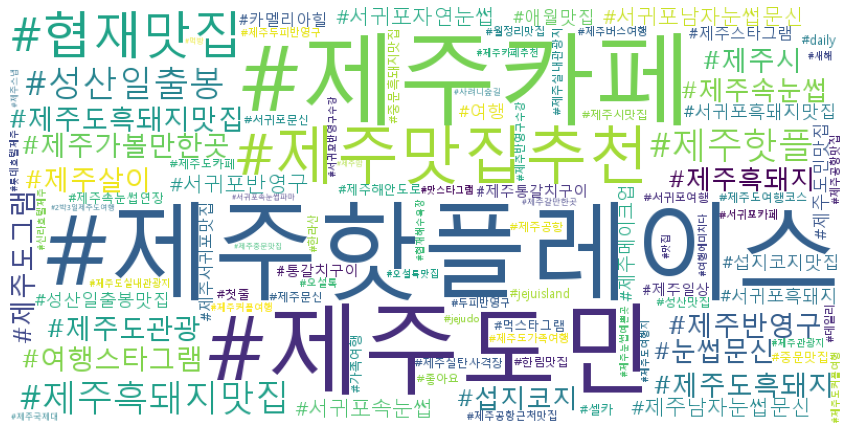

In [12]:
# 예제 4-19 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/3_2_tag-wordcloud.png')  